In [18]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

import scipy.sparse as sp
import scipy.sparse.linalg as spla

import scipy.fftpack as fft

import sympy as smp

# 3(d)

In [83]:
def test_dst(x):
    N = len(x)+1
    sines = np.sin(np.pi/N * np.multiply.outer(np.arange(1,N), np.arange(1,N)))
    return 1/N * sines @ x
    
def test_idst(x):
    N = len(x)+1
    sines = np.sin(np.pi/N * np.multiply.outer(np.arange(1,N), np.arange(1,N)))
    return 2 * sines @ x

def foo1(x):
    return np.sin(x)
def exact1(x):
    return -np.sin(x)

def foo2(x):
    return np.tanh(4*np.sin(x))

In [78]:
x = smp.symbols('x')
f = smp.tanh(4*smp.sin(x))
#print(f.integrate(x))
smp.integrate(x**3, x)

x**4/4

1.658579169705992e-05


<IPython.core.display.Javascript object>


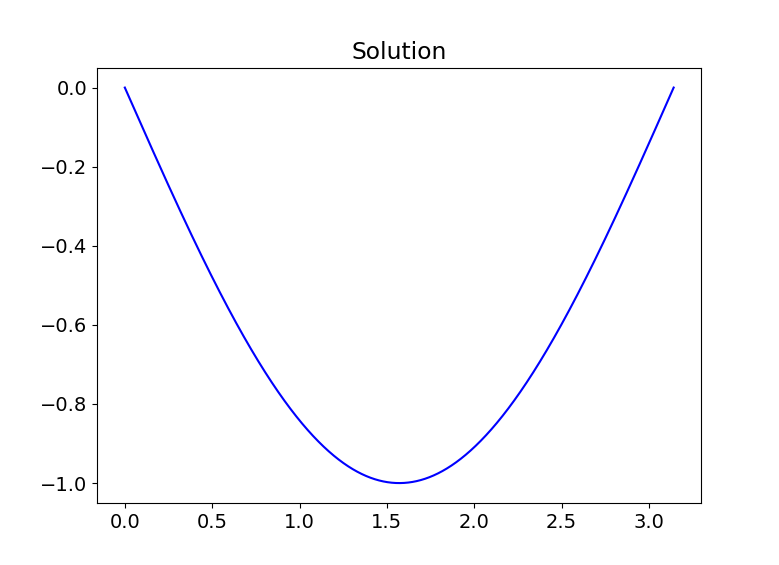

In [85]:
n = 10**5 - 1 #solves for n points on the interior
#N = n-1
a = 1
b = -2

D = sp.diags([[b]*n, [a]*(n-1), [a]*(n-1)], offsets=[0,1,-1], format='csr')
h = np.pi/(n+1)
xs = np.pi* np.arange(1, n+1)/(n+1)
fs = foo1(xs) * h**2

#u = spla.spsolve(D,fs)
u = exact1(xs)

f_hat = fft.dst(fs,type=1)/(2*n+2) # the dst in scipy must be normalized
u_hat = f_hat / (2*a * np.cos(np.pi*np.arange(1,n+1)/(n+1)) + b)

u2 = fft.idst(u_hat, type=1)

print(la.norm(u-u2))
plt.plot(xs, u2, 'b-')
#plt.plot(xs, foo2(xs))
plt.title('Solution')
plt.show()

In [38]:
np.pi - xs[-3:] #- xs[:3]

array([0.00941536, 0.00627691, 0.00313845])

In [86]:
h**2

9.869604401089355e-10

In [39]:
len(xs)

1000

In [72]:
f2 = test_dst(f)
la.norm(f2 - fft.dst(f, type=1)/(2*n+2))

5.547728002917695e-15

In [85]:
la.norm(f - fft.dst(fft.dst(f, type=1)/(2*n+2), type=1))

5.4672143489065705e-16

In [74]:
la.norm(f - fft.dst(test_dst(f), type=1))

1.032034014607267e-13

In [76]:
u_hat[:5]

array([ 0.4670243 , -0.0537676 ,  0.15689964, -0.02720325,  0.09564448])

In [92]:
np.tanh(3)

0.9950547536867305